In [1]:
import re
import matplotlib.pyplot as plt

In [2]:
class processingLog():
    def __init__(self):
        digitPattern = '\d+\.?\d*'
        self.reLoss = re.compile('loss = ' + digitPattern)
        self.reEpoch = re.compile('epoch = ' + digitPattern)
        self.reDigit = re.compile(digitPattern)
        
    def getDigit(self, log):
        digit = self.reDigit.findall(log)
        if len(digit) == 0:
            raise Exception('Absence digit')
        return float(digit[0])

    def getLoss(self, log):
        loss = self.reLoss.findall(log)
        if len(loss) == 0:
            raise Exception('Absence loss')
        return self.getDigit(loss[0])
    
    def getEpoch(self, log):
        epoch = self.reEpoch.findall(log)
        if len(epoch) == 0:
            raise Exception('Absence epoch')
        return self.getDigit(epoch[0])
    
    def getLossTrainValid(self, pathFile, passFirst=0, get='all', step=1):
        if get == 'all':
            get = 10e20
        lossTrain = []
        epochTrain = []
        lossValid = []
        epochValid = []
        with open(pathFile) as logFile:
            for i, line in enumerate(logFile):
                if i < 2 * passFirst:
                    continue
                if i % 2 == 0:
                    epoch = self.getEpoch(line)
                    if epoch % step == 0:
                        loss = self.getLoss(line)
                        lossTrain.append(loss)
                        epochTrain.append(epoch)
                else:
                    epoch = self.getEpoch(line)
                    if epoch % step == 0:    
                        loss = self.getLoss(line)
                        lossValid.append(loss)
                        epochValid.append(epoch)
                if i > get:
                    break
        return lossTrain, epochTrain, lossValid, epochValid
    
    def createPlt(self, pathFile, passFirst=0, get='all', step=1):
        lossTrain, epochTrain, lossValid, epochValid = self.getLossTrainValid(pathFile, passFirst, get, step)
        plt.figure(figsize=(50,20))
        plt.rc('axes', labelsize=50)
        plt.rc('xtick', labelsize=30)
        plt.rc('ytick', labelsize=30)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(epochTrain, lossTrain, label='Train')
        plt.plot(epochValid, lossValid, label='Valid')
        plt.legend()
        return plt
    
    def savePlt(self, plot, pathOut):
        plot.savefig(pathOut)

In [4]:
if __name__ == "__main__":
    extLog = processingLog()
    extLog.createPlt('./train.log', passFirst=10, get='all', step=1).savefig('./grafLoss')

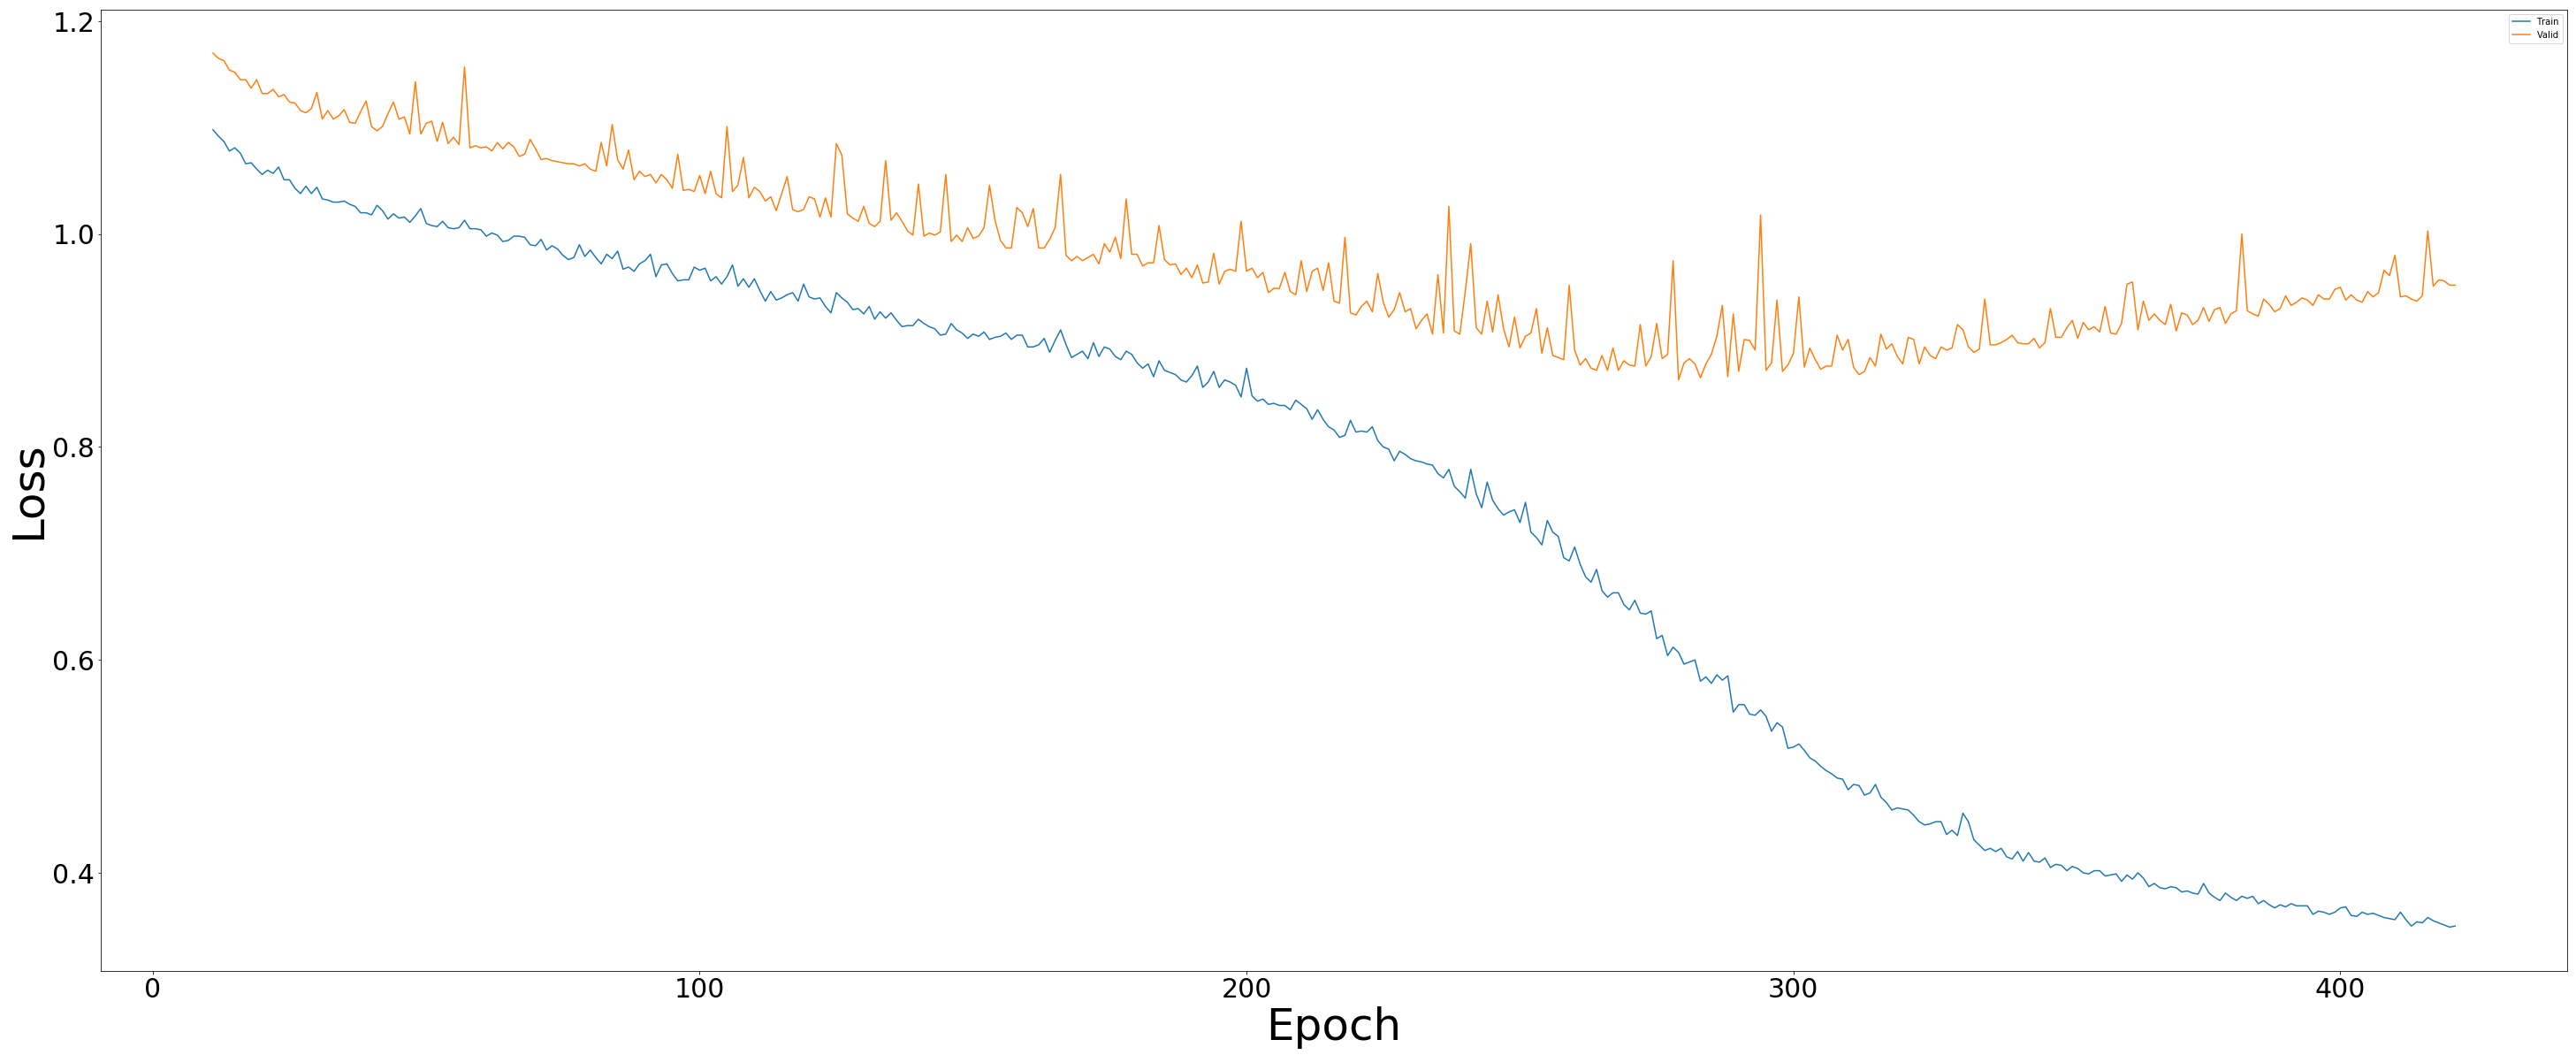

In [3]:

# .savefig('./grafLoss')

In [6]:
!python ./grafLoss.py